In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset=pd.read_csv("general_data.csv") #importing dataset
with pd.option_context('display.max_columns', 40):
  print(dataset[['MonthlyIncome','YearsAtCompany','Age','DistanceFromHome','PercentSalaryHike','JobLevel','NumCompaniesWorked','TotalWorkingYears','YearsSinceLastPromotion','TrainingTimesLastYear']].describe(include="all"))
dataset.drop_duplicates
#Checking for null valuea
print(dataset.isnull())
#droping null values
dataset.dropna(inplace=True)
print(dataset.dtypes)
display(dataset)

       MonthlyIncome  YearsAtCompany          Age  DistanceFromHome  \
count    4410.000000     4410.000000  4410.000000       4410.000000   
mean    65029.312925        7.008163    36.923810          9.192517   
std     47068.888559        6.125135     9.133301          8.105026   
min     10090.000000        0.000000    18.000000          1.000000   
25%     29110.000000        3.000000    30.000000          2.000000   
50%     49190.000000        5.000000    36.000000          7.000000   
75%     83800.000000        9.000000    43.000000         14.000000   
max    199990.000000       40.000000    60.000000         29.000000   

       PercentSalaryHike     JobLevel  NumCompaniesWorked  TotalWorkingYears  \
count        4410.000000  4410.000000         4391.000000        4401.000000   
mean           15.209524     2.063946            2.694830          11.279936   
std             3.659108     1.106689            2.498887           7.782222   
min            11.000000     1.000000   

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,No,Travel_Rarely,Sales,4,3,Other,1,4405,Female,2,Human Resources,Single,35390,1.0,Y,18,8,0,6.0,2,6,1,5
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,1,Research Scientist,Single,60290,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,1,Laboratory Technician,Divorced,26790,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,2,Sales Executive,Married,37020,0.0,Y,20,8,0,5.0,4,4,1,2


In [81]:
#Encoding categorical values
from sklearn import preprocessing
lab_enc=preprocessing.LabelEncoder()
dataset['Attrition']=lab_enc.fit_transform(dataset['Attrition'])
dataset['BusinessTravel']=lab_enc.fit_transform(dataset['BusinessTravel'])
dataset['Department']=lab_enc.fit_transform(dataset['Department'])
dataset['EducationField']=lab_enc.fit_transform(dataset['EducationField'])
dataset['Gender']=lab_enc.fit_transform(dataset['Gender'])
dataset['JobRole']=lab_enc.fit_transform(dataset['JobRole'])
dataset['MaritalStatus']=lab_enc.fit_transform(dataset['MaritalStatus'])
display(dataset)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,1,1,0,1,0,1,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,1,1,1,10,1,1,1,2,0,1,6,2,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,0,1,1,17,4,4,1,3,1,4,7,1,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,0,0,1,2,5,1,1,4,1,3,1,1,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,0,2,1,10,1,3,1,5,1,1,7,2,23420,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,0,2,2,4,3,4,1,4405,0,2,1,2,35390,1.0,Y,18,8,0,6.0,2,6,1,5
4405,42,0,2,1,5,4,3,1,4406,0,1,6,2,60290,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,0,2,1,2,4,3,1,4407,1,1,2,0,26790,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,0,2,1,25,2,1,1,4408,1,2,7,1,37020,0.0,Y,20,8,0,5.0,4,4,1,2


In [82]:
#Creating a table on factors that might affect attrition
df = dataset[['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField','MaritalStatus', 'JobLevel', 'JobRole', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]
display(df)


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,MaritalStatus,JobLevel,JobRole,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,1,1,0,131160,1.0,11,1.0,6,1,0,0
1,31,1,1,1,10,1,1,2,1,6,41890,0.0,23,6.0,3,5,1,4
2,32,0,1,1,17,4,4,1,4,7,193280,1.0,15,5.0,2,5,0,3
3,38,0,0,1,2,5,1,1,3,1,83210,3.0,11,13.0,5,8,7,5
4,32,0,2,1,10,1,3,2,1,7,23420,4.0,12,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,0,2,2,4,3,4,2,2,1,35390,1.0,18,6.0,2,6,1,5
4405,42,0,2,1,5,4,3,2,1,6,60290,3.0,17,10.0,5,3,0,2
4406,29,0,2,1,2,4,3,0,1,2,26790,2.0,15,10.0,2,3,0,2
4407,25,0,2,1,25,2,1,1,2,7,37020,0.0,20,5.0,4,4,1,2


In [83]:
#Calculating mean
df.mean()

Age                           36.933364
Attrition                      0.160885
BusinessTravel                 1.607257
Department                     1.260840
DistanceFromHome               9.198996
Education                      2.912369
EducationField                 2.247147
MaritalStatus                  1.099270
JobLevel                       2.063898
JobRole                        4.459836
MonthlyIncome              65061.702419
NumCompaniesWorked             2.693291
PercentSalaryHike             15.210634
TotalWorkingYears             11.290278
TrainingTimesLastYear          2.798266
YearsAtCompany                 7.010497
YearsSinceLastPromotion        2.191693
YearsWithCurrManager           4.126198
dtype: float64

In [84]:
#calculating median
df.median()

Age                           36.0
Attrition                      0.0
BusinessTravel                 2.0
Department                     1.0
DistanceFromHome               7.0
Education                      3.0
EducationField                 2.0
MaritalStatus                  1.0
JobLevel                       2.0
JobRole                        5.0
MonthlyIncome              49190.0
NumCompaniesWorked             2.0
PercentSalaryHike             14.0
TotalWorkingYears             10.0
TrainingTimesLastYear          3.0
YearsAtCompany                 5.0
YearsSinceLastPromotion        1.0
YearsWithCurrManager           3.0
dtype: float64

In [85]:
df.mode()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,MaritalStatus,JobLevel,JobRole,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,35,0,2,1,2,3,1,1,1,7,23420,1.0,11,10.0,2,5,0,2


In [86]:
df.var()

Age                        8.348974e+01
Attrition                  1.350321e-01
BusinessTravel             4.430699e-01
Department                 2.782150e-01
DistanceFromHome           6.569744e+01
Education                  1.050068e+00
EducationField             1.768395e+00
MaritalStatus              5.322569e-01
JobLevel                   1.223490e+00
JobRole                    6.056706e+00
MonthlyIncome              2.222397e+09
NumCompaniesWorked         6.239165e+00
PercentSalaryHike          1.341762e+01
TotalWorkingYears          6.061739e+01
TrainingTimesLastYear      1.662558e+00
YearsAtCompany             3.756894e+01
YearsSinceLastPromotion    1.040059e+01
YearsWithCurrManager       1.274257e+01
dtype: float64

In [87]:
#finding skewness
df_skew=pd.DataFrame(df.skew(),columns=["Skew"])
df_skew

,Skew
Age,0.413048
Attrition,1.846529
BusinessTravel,-1.437507
Department,0.173436
DistanceFromHome,0.955517
Education,-0.288977
EducationField,0.550083
MaritalStatus,-0.155093
JobLevel,1.021797
JobRole,-0.357663


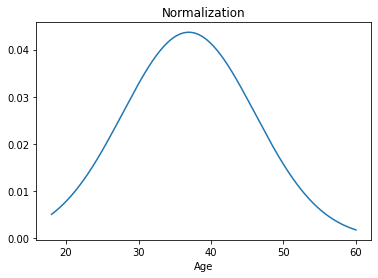

In [88]:
from scipy.stats import norm
#normal distribution of Age
domain=np.linspace(df['Age'].min(),df['Age'].max(),df['Age'].count())
plt.plot(domain,norm.pdf(domain,df['Age'].mean(),df['Age'].std()))
plt.title("Normalization")
plt.xlabel("Age")

plt.show()

(array([169., 314., 666., 792., 759., 644., 392., 276., 230., 140.]),
 array([18. , 22.2, 26.4, 30.6, 34.8, 39. , 43.2, 47.4, 51.6, 55.8, 60. ]),
 <a list of 10 Patch objects>)

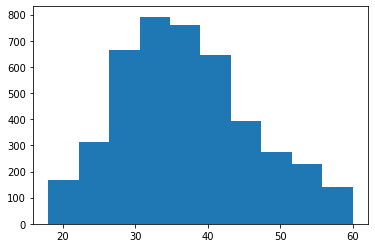

In [89]:
#Histogram of Age
plt.hist(df['Age'])

**Performing MannWhitney Test**

In [91]:
#Here we are comparing two Independent samples
con = df[['Age', 'DistanceFromHome', 'MonthlyIncome','NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]

In [92]:
from scipy.stats import mannwhitneyu
def mwtest(name):
  print(f"{name} with Attrition")
  print(f"\t Null Hypothesis=There is no significant difference in attrition_yes_{name} with attrition_no_{name}")
  print(f"\tAlternative Hypothesis=There is significant difference in attrition_yes{name} with attrition_no{name}\n")
  print("\tPerforming mannwhitney test to obtain p value")
  stats,p=mannwhitneyu(data_yes[name],data_no[name])
  print("\t",p)
  if(p<0.05):
    print(f"\tReject the Nulll hypothesis,Hence there is significant difference in {name} between attrition Yes and No")
  else:
    print(f"\tAccept the Null hypothesis,Hence there is no significant difference in {name} between attrition Yes and No")
  print("\n")

In [93]:
col=list(con.columns)
for name in col:
  mwtest(name)

Age with Attrition
	 Null Hypothesis=There is no significant difference in attrition_yes_Age with attrition_no_Age
	Alternative Hypothesis=There is significant difference in attrition_yesAge with attrition_noAge

	Performing mannwhitney test to obtain p value
	 7.98668614365882e-30
	Reject the Nulll hypothesis,Hence there is significant difference in Age between attrition Yes and No


DistanceFromHome with Attrition
	 Null Hypothesis=There is no significant difference in attrition_yes_DistanceFromHome with attrition_no_DistanceFromHome
	Alternative Hypothesis=There is significant difference in attrition_yesDistanceFromHome with attrition_noDistanceFromHome

	Performing mannwhitney test to obtain p value
	 0.488538986087403
	Accept the Null hypothesis,Hence there is no significant difference in DistanceFromHome between attrition Yes and No


MonthlyIncome with Attrition
	 Null Hypothesis=There is no significant difference in attrition_yes_MonthlyIncome with attrition_no_MonthlyIncome
	A

To compare two independent samples we are going for T-Test:

**Performing Independent t-Test**

In [94]:
#Checking affect of attrition of employees for lower job_level and higher job_level
jb_lev_1=data_yes[data_yes['JobLevel']<=2]
jb_lev_2=data_yes[data_yes['JobLevel']>2]
display(jb_lev_1)
display(jb_lev_2)
from scipy.stats import ttest_ind
stats,p=ttest_ind(jb_lev_1["JobLevel"],jb_lev_2["JobLevel"])
print(stats,p)
if(p<0.05):
  print("Reject null hypothesis,Hence there is significant difference in attrition of employees with lower job_level and higher job_level ")
else:
  print("Accept null hypothesis,Hence there is no significant difference in attrition of employees with lower job_level and higher job_level")


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,MaritalStatus,JobLevel,JobRole,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
1,31,1,1,1,10,1,1,2,1,6,41890,0.0,23,6.0,3,5,1,4
6,28,1,2,1,11,2,3,2,2,7,58130,2.0,20,5.0,2,0,0,0
13,47,1,0,1,1,1,3,1,1,6,57620,1.0,11,10.0,4,10,9,9
28,44,1,1,1,1,2,3,0,2,6,103330,3.0,14,19.0,2,1,0,0
35,26,1,2,1,8,3,3,2,2,3,157870,1.0,12,8.0,5,8,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4369,29,1,2,1,2,3,1,2,1,7,49780,0.0,13,7.0,3,6,1,5
4381,29,1,2,1,7,1,1,2,1,6,21800,1.0,21,4.0,2,4,0,1
4386,33,1,2,2,11,4,2,1,1,6,71400,5.0,21,8.0,2,5,0,4
4388,33,1,2,2,1,3,1,1,2,3,51470,7.0,11,13.0,2,9,1,7


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,MaritalStatus,JobLevel,JobRole,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
30,26,1,2,1,4,3,3,0,3,6,68540,2.0,11,5.0,5,3,0,2
99,21,1,1,1,9,3,3,2,4,4,178750,1.0,12,3.0,5,3,1,2
105,33,1,2,0,28,2,0,2,5,3,55610,1.0,21,1.0,3,1,0,0
127,30,1,1,2,3,2,2,2,3,6,11290,9.0,19,3.0,2,1,0,0
147,25,1,2,1,5,2,1,1,3,2,26600,5.0,13,6.0,3,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4263,34,1,1,0,4,4,1,2,5,7,55620,1.0,15,9.0,3,9,0,6
4276,31,1,2,1,2,4,5,1,3,7,21410,4.0,20,12.0,2,7,7,7
4334,41,1,2,1,18,4,1,2,5,2,53470,1.0,24,4.0,1,4,0,2
4356,38,1,2,2,6,4,1,1,3,6,107480,7.0,15,17.0,3,1,0,0


-41.49978753156067 3.283825040546891e-191
Reject null hypothesis,Hence there is significant difference in attrition of employees with lower job_level and higher job_level 


In [95]:
#Checking affect of attrition of employees for yearsatcompany less than 7 years and greater than 7 years
yearscomp1=data_yes[data_yes['YearsAtCompany']<=7]
yearscomp2=data_yes[data_yes['YearsAtCompany']>7]
stats,p=ttest_ind(yearscomp1['YearsAtCompany'],yearscomp2['YearsAtCompany'])
display(yearscomp1)
display(yearscomp2.count())
print(stats,p)
if p<0.05:
  print("Reject Null Hypothesis,Hence there is significant difference in attrition of employees with years at the company less than 7 years and more than 7 years")
else:
  print("Accept Null Hypothesis,Hence there is no significant difference in attrition of employees with years at the company less than 7 years and more than 7 years")

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,MaritalStatus,JobLevel,JobRole,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
1,31,1,1,1,10,1,1,2,1,6,41890,0.0,23,6.0,3,5,1,4
6,28,1,2,1,11,2,3,2,2,7,58130,2.0,20,5.0,2,0,0,0
28,44,1,1,1,1,2,3,0,2,6,103330,3.0,14,19.0,2,1,0,0
30,26,1,2,1,4,3,3,0,3,6,68540,2.0,11,5.0,5,3,0,2
38,18,1,2,1,1,4,1,2,1,7,23350,1.0,14,0.0,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4369,29,1,2,1,2,3,1,2,1,7,49780,0.0,13,7.0,3,6,1,5
4381,29,1,2,1,7,1,1,2,1,6,21800,1.0,21,4.0,2,4,0,1
4386,33,1,2,2,11,4,2,1,1,6,71400,5.0,21,8.0,2,5,0,4
4391,32,1,2,2,23,1,1,2,3,0,24680,0.0,11,4.0,2,3,1,2


Age                        165
Attrition                  165
BusinessTravel             165
Department                 165
DistanceFromHome           165
Education                  165
EducationField             165
MaritalStatus              165
JobLevel                   165
JobRole                    165
MonthlyIncome              165
NumCompaniesWorked         165
PercentSalaryHike          165
TotalWorkingYears          165
TrainingTimesLastYear      165
YearsAtCompany             165
YearsSinceLastPromotion    165
YearsWithCurrManager       165
dtype: int64

-30.580567741455223 2.8648036320196043e-131
Reject Null Hypothesis,Hence there is significant difference in attrition of employees with years at the company less than 7 years and more than 7 years


In [96]:
#Checking affect of attrition of employees for TotalWorkingYears less than 10 and greater than 10
t_w_y1=data_yes[data_yes['TotalWorkingYears']<10]
t_w_y2=data_yes[data_yes['TotalWorkingYears']>=10]
stats,p=ttest_ind(t_w_y1['TotalWorkingYears'],t_w_y2['TotalWorkingYears'])
display(t_w_y1)
display(t_w_y2)
print(stats,p)
if p<0.05:
  print("Reject null hypothesis,Hence there is signicant difference of attrition of employees with TotalWorkingYears<10 and greater than 10")
else:
   print("Accept null hypothesis,Hence there is no signicant difference of attrition of employees with TotalWorkingYears<10 and greater than 10")

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,MaritalStatus,JobLevel,JobRole,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
1,31,1,1,1,10,1,1,2,1,6,41890,0.0,23,6.0,3,5,1,4
6,28,1,2,1,11,2,3,2,2,7,58130,2.0,20,5.0,2,0,0,0
30,26,1,2,1,4,3,3,0,3,6,68540,2.0,11,5.0,5,3,0,2
35,26,1,2,1,8,3,3,2,2,3,157870,1.0,12,8.0,5,8,7,4
38,18,1,2,1,1,4,1,2,1,7,23350,1.0,14,0.0,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4368,30,1,1,2,3,2,3,2,2,0,28620,5.0,14,9.0,2,6,0,1
4369,29,1,2,1,2,3,1,2,1,7,49780,0.0,13,7.0,3,6,1,5
4381,29,1,2,1,7,1,1,2,1,6,21800,1.0,21,4.0,2,4,0,1
4386,33,1,2,2,11,4,2,1,1,6,71400,5.0,21,8.0,2,5,0,4


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,MaritalStatus,JobLevel,JobRole,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
13,47,1,0,1,1,1,3,1,1,6,57620,1.0,11,10.0,4,10,9,9
28,44,1,1,1,1,2,3,0,2,6,103330,3.0,14,19.0,2,1,0,0
59,52,1,2,1,7,1,1,1,2,6,47740,2.0,18,11.0,2,8,7,7
69,39,1,2,1,1,1,3,1,1,2,42840,4.0,17,12.0,0,1,0,0
177,33,1,2,1,10,3,1,1,4,5,67280,7.0,22,15.0,2,7,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4356,38,1,2,2,6,4,1,1,3,6,107480,7.0,15,17.0,3,1,0,0
4357,29,1,2,2,10,2,1,1,2,6,15550,1.0,19,10.0,2,10,1,9
4362,32,1,2,1,5,3,3,1,1,0,34770,1.0,11,14.0,2,14,9,8
4388,33,1,2,2,1,3,1,1,2,3,51470,7.0,11,13.0,2,9,1,7


-30.54643611970281 4.485860506623551e-131
Reject null hypothesis,Hence there is signicant difference of attrition of employees with TotalWorkingYears<10 and greater than 10


**Chi-Square Test**

In [66]:
import scipy.stats as stats
import seaborn as sns
from scipy.stats import chi2_contingency
def chi(name):
  print(f"Chi square test to find the dependency between {name} and Attrition")
  table=pd.crosstab(dataset[name],dataset['Attrition'])
  print("\nTable:\n\n",table)
  stats,p,dof,expected=chi2_contingency(table)
  print("Value of p is\n",p)
  if p<0.05:
    print(f"Reject Null Hypothesis,Hence there is dependency between {name} and Attrition")
  else:
    print(f"Accept Null Hypothesis,Hence there is no dependency between {name} and Attrition")



In [61]:
chi('Gender')

Chi square test to find the dependency between Gender and Attrition

Table:

 Attrition     0    1
Gender              
0          1488  268
1          2189  437
Value of p is
 0.23966176275638887
Accept Null Hypothesis,Hence there is no dependency between Gender and Attrition


In [67]:
chi('BusinessTravel')

Chi square test to find the dependency between BusinessTravel and Attrition

Table:

 Attrition          0    1
BusinessTravel           
0                412   36
1                621  204
2               2644  465
Value of p is
 6.07019702736392e-16
Reject Null Hypothesis,Hence there is dependency between BusinessTravel and Attrition


In [69]:
chi('Education')

Chi square test to find the dependency between Education and Attrition

Table:

 Attrition     0    1
Education           
1           430   78
2           683  159
3          1438  263
4          1003  185
5           123   20
Value of p is
 0.1796305098427322
Accept Null Hypothesis,Hence there is no dependency between Education and Attrition


In [70]:
chi('Department')

Chi square test to find the dependency between Department and Attrition

Table:

 Attrition      0    1
Department           
0            132   55
1           2416  449
2           1129  201
Value of p is
 2.3829705707693105e-06
Reject Null Hypothesis,Hence there is dependency between Department and Attrition


In [71]:
chi('MaritalStatus')

Chi square test to find the dependency between MaritalStatus and Attrition

Table:

 Attrition         0    1
MaritalStatus           
0               872   98
1              1756  251
2              1049  356
Value of p is
 8.573051828219502e-30
Reject Null Hypothesis,Hence there is dependency between MaritalStatus and Attrition


In [72]:
chi('StockOptionLevel')

Chi square test to find the dependency between StockOptionLevel and Attrition

Table:

 Attrition            0    1
StockOptionLevel           
0                 1564  316
1                 1509  267
2                  388   84
3                  216   38
Value of p is
 0.32799207189761653
Accept Null Hypothesis,Hence there is no dependency between StockOptionLevel and Attrition
